Enter the known points (x, y, value). Enter 'done' to finish input.


Enter point (x, y, value):  10 15 20 
Enter point (x, y, value):  14 17 50
Enter point (x, y, value):  1 6  7
Enter point (x, y, value):  done 


Invalid input. Please try again.


Enter point (x, y, value):  10 13 16
Enter point (x, y, value):  18 75 2
Enter point (x, y, value):  12 45 7
Enter point (x, y, value):  done
Enter the grid cell size:  10


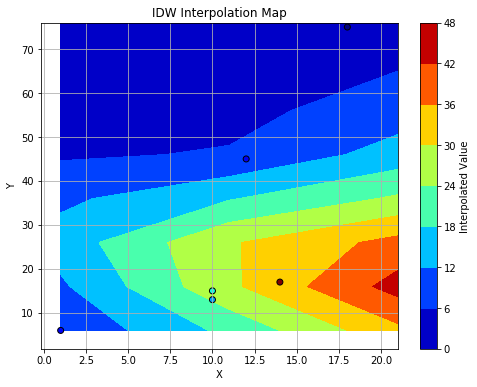

In [1]:

import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

# Function to input known points interactively
def input_known_points():
    known_points = []
    print("Enter the known points (x, y, value). Enter 'done' to finish input.")
    while True:
        point_input = input("Enter point (x, y, value): ")
        if point_input == "done":
            break
        try:
            x, y, value = map(float, point_input.split())
            known_points.append((x, y, value))
        except ValueError:
            print("Invalid input. Please try again.")
    return known_points

# Function to input grid cell size from user
def input_grid_cell_size():
    while True:
        cell_size = input("Enter the grid cell size: ")
        try:
            cell_size = float(cell_size)
            if cell_size <= 0:
                print("Invalid input. Cell size must be a positive number.")
            else:
                return cell_size
        except ValueError:
            print("Invalid input. Please enter a number.")

# Input known points interactively
known_points = input_known_points()

if len(known_points) < 3:
    print("At least 3 known points are required for interpolation.")
else:
    # Extract coordinates and values from known points
    x = np.array([point[0] for point in known_points])
    y = np.array([point[1] for point in known_points])
    values = np.array([point[2] for point in known_points])

    # Input grid cell size from user
    cell_size = input_grid_cell_size()

    # Define the grid for interpolation
    grid_x, grid_y = np.meshgrid(
        np.arange(x.min(), x.max() + cell_size, cell_size),
        np.arange(y.min(), y.max() + cell_size, cell_size)
    )
    grid_points = np.column_stack((grid_x.flatten(), grid_y.flatten()))

    # Perform IDW interpolation using Rbf function
    rbf = Rbf(x, y, values, function='linear')
    interp_values = rbf(grid_points[:, 0], grid_points[:, 1])

    # Reshape interpolated values to match the grid shape
    interp_values = interp_values.reshape(grid_x.shape)

    # Create the interpolated map with grid
    plt.figure(figsize=(8, 6))
    plt.contourf(grid_x, grid_y, interp_values, cmap='jet')
    plt.colorbar(label='Interpolated Value')
    plt.scatter(x, y, c=values, cmap='jet', edgecolors='k')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('IDW Interpolation Map')

    # Add grid lines
    plt.grid(True)

    plt.show()
